$\rule{800pt}{20pt}$

# Instructions
<br>
<font size="+1">
    <ul>
        <li><b>Recommended Steps</b></li>
        <br>
        <ol>
            <li>Read the prompt and summarize the task in your own words, using as few words as possible for ease of comprehension.</li>
            <br>
            <li>Pretend to be the computer program that you are trying to create. Examine the smaple inputs and manually produce the appropriate results. Afterward, verify the correctness of your logic by comparing with the given sample outputs.</li>
            <br>
            <li>On a scrap piece of paper, write step-by-step instructions so that someone else can pretend to be the computer program and produce the appropriate results for any possible inputs. These instructions should target a human audience who does not know the problem description and only has your instructions as a guide. These instructions should serve as the roadmap for your code.</li>
            <br>
            <li>On another scrap piece of paper, write fragments of Python code to implement each step in your roadmap, focusing especially on the trickiest parts of the logic.</li>
            <br>
            <li>With your roadmap and code fragments from the previous steps, type Python code into a new Jupyter notebook cel to solve the given problem. You should type incrementally and run the code whenever you add a small chunk. This allows you to correct errors as they occur. It may also be helpful to print intermediate results to verify that the code is carrying out the logic as desired.</li>
            <br>
            <li>Run your code with some sample inputs and verify that the outputs are exactly the same as the sample outputs.</li>
            <br>
            <li>Once all of your problems are finished, it is useful to click <i>Kernel</i> $\rightarrow$ <i>Restart & Run All</i> to verify that your outputs for all of your problems continue to be correct. This helps to ensure that someone else will be able to replicate your results when running your notebook.</li>
            <br>
            <font color="red"><li style="color:red">Submit the <i>.ipynb</i> file on TurnItIn on Blackboard by the deadline. Be sure to refresh the page and double check your submission actually went through. <b>Note that you only need to submit your solutions, not all of the other recommended steps.</b> The recommended steps are meant to serve as a guide for your thinking process.</li></font>
            <br>
            <ul style="color:red">
            <font color="red"><li>Do your best to make sure that I will be able to run it.</li>
        <br>
        <li>For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.</li>
        <br>
        <li>Please use Text/Markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use Text/Markdown.)</li>
        <br>
        <li><b>Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation</b>. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.</li></font>
        <br>
            </ul>
        </ol>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li><b>Grading</b></li>
        <br>
        <li>There are four possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for $100%$ mastery of the material, as the little details matter in programming.</li>
        <br>
        <ul>
            <li>Grade of $5$ out of $5$ - perfect submission with no significant errors</li>
            <br>
            <li>Grade of $4$ out of $5$ - near perfect submission with one or more significant errors</li>
            <br>
            <li>Grade of $2$ out of $5$ - apparent effort but far from perfect</li>
            <br>
            <li>Grade of $0$ out of $5$ - no submission or no apparent effort</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

# Before You Begin
<br>
<font size="+1">
    <ul>
        <li>Please read: <b>01_Complexity_in_Return_Predictions_for_Asset_Management_Using_Dense_Neural_Networks_and_Keras_API.ipynb</b></li>
        <br>
    </ul>
</font>

$\rule{800pt}{20pt}$

# Imports

In [ ]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import cvxpy as cp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
images_path = '/content/drive/My Drive/DSO_464_Spring_2024/Images'

data_path = '/content/drive/My Drive/DSO_464_Spring_2024/01_Fundamentals_of_Machine_Learning_with_TensorFlow_I_EX_Predicting_Demand_with_Sales_Data_for_Dynamic_Pricing/Data'

$\rule{800pt}{20pt}$

# Questions Using <a href="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.38720&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">A Neural Network Playground</a>
<br>
<font size="+1">
  <ul>
    <li>The TensorFlow playground is a handy neural network simulator built
by the TensorFlow team. In this exercise, you will train several binary
classifiers in just a few clicks, and tweak the model’s architecture and its
hyperparameters to gain some intuition on how neural networks work
and what their hyperparameters do.</li>
<br>
<li>Use this Neural Network Playground: <a href="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.38720&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">hyperlinked here</a>.</li>
<br>
</ul>
</font>

$\square$

## Question 1

- This question is meant to illustrate some of the patterns that neural networks learn.

- To start, begin training the default neural network by clicking the **Run** button (top left).

- Notice how it quickly finds a good solution for the classification task.

-  The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple
patterns of the first hidden layer into more complex patterns.

- In general, the more layers there are, the more complex the patterns
can be.

- **Please summarize what you observed in this question, and describe or give some hypotheses / guesses about why you think it occurred (your guesses don't have to be right; this exercise is for your creative learning). Your summary should be at least three to four sentences long.**

In [ ]:
# You can write your summary using comments, but it is preferred if you use "Text/Markdown", i.e. write in the following cell.

You can write your summary in this TEXT cell.
- The classifier starts with some boundaries that look just random. I guess this is due to the fact that weights and biases are indeed initialized randomly.
- Around 50 epochs, the classifier seems to catch the "shape" of the training data, i.e. it finds a hyperplane that separates blues from yellow.
- After these 50 epochs, the model is achieving a pretty good test loss, which dropped from an initial 0.5+ to around 0.01. Loss keeps decreasing with further training, but the gains become marginal.
- An interesting fact is that the neurons in the first layer can only learn separators that look like straight lines, while the neurons in the following layer are able to learn more complex separators, such as lines composed by multiple edges.

## Question 2

- This question is meant to illustrate the use of **activation functions**.

- Try replacing the **tanh** activation function with a **ReLU** activation function, and train the network again.

- Notice that it finds a solution even faster, but this time the **boundaries are linear**. This is due to the shape of the ReLU function.

- **Please summarize what you observed in this question, and describe or give some hypotheses / guesses about why you think it occurred (your guesses don't have to be right; this exercise is for your creative learning). Your summary should be at least three to four sentences long.**

In [ ]:
# You can write your summary using comments, but it is preferred if you use "Text/Markdown", i.e. write in the following cell.

You can write your summary in this TEXT cell.
- In the first hidden layer, there seems to be no big changes with respect to the previous case. This makes sense, as the activation function is actually applied afterwards.
- Note, however, how in the second hidden layer one neuron is able to fully capture the shape of the data, learning a perfect seperator. Not by change, the weight connecting this neuron to the output is much stronger weight (in absolute value) than the other neuron in the last hidden layer.
- Regarding the shapes of the classifier, tanh in the previous case was obtaining a circular boundary. I guess this is due to the fact that tanh is a smooth function. On the other side, relu is not smooth as it is piecewise linear, so the boundary is all segmented.

## Question 3

- This question is meant to illustrate the risk of a neural network not finding weights that are a global minimum (i.e. getting stuck in local minimum).

- Modify the network architecture to have just **one hidden layer** with **three neurons**.

- Train it multiple times (to reset the network weights, click the **Reset** button next to the **Play** button).

- Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum, i.e. it chooses weights that do not give the smallest loss.

- **Please summarize what you observed in this question, and describe or give some hypotheses / guesses about why you think it occurred (your guesses don't have to be right; this exercise is for your creative learning). Your summary should be at least three to four sentences long.**

In [ ]:
# You can write your summary using comments, but it is preferred if you use "Text/Markdown", i.e. write in the following cell.

You can write your summary in this TEXT cell.

- Running the experiment multiple times, one interesting fact is that the NN manages to obtain a pretty low training and test loss at any of the experiments. However, the weights of the optimized NN are always different, suggesting that there are many functions that are able to predict our target.
- As mentioned by the task, the training time varies a lot. This is due to the fact that the network is being trained using some stochastic algorithm, hence sometimes we end up in a local minimum and it is hard for the optimizer to get out of it, as the gradient converges to zero even if this is not the optimal solution.
- One other interesting fact I would like to mention is that I experimented increasing the learning to 1. This causes the boundary of the separator to "bounce" at each epoch, which is also represented by a very unstable loss. Eventually, this leads the NN to be stuck in a very efficient local minimum, as during the weight update we are taking confident steps in what could be a wrong direction of decrease of the loss.

## Question 4

- This question is meant to illustrate what happens when neural networks are **too small**.

- Remove one neuron to keep just two neurons.

- Notice that the neural network is now incapable of finding a good solution, even if you try multiple times.

- The model has too few parameters and systematically **underfits** the training set.

- **Please summarize what you observed in this question, and describe or give some hypotheses / guesses about why you think it occurred (your guesses don't have to be right; this exercise is for your creative learning). Your summary should be at least three to four sentences long.**

In [ ]:
# You can write your summary using comments, but it is preferred if you use "Text/Markdown", i.e. write in the following cell.

You can write your summary in this TEXT cell.

- It seems that the NN is not able to learn the circular pattern of the data provided. Indeed, as we only have two neurons, I believe this NN would still be able to perform classification for linearly separable data, but not in this case.
- This happens because each additional neuron enhances the model's capacity to represent a more complex function, due to the fact that we have a new set of weights introduced into the model. In other words, we are underfitting, i.e. our model is not complex enough to capture the structure of the data. Our model is biased because of the omission of parameters, and it would not perform well neither in the case in which we had infinite training data.
- To account for this problem, we can increase the size of the network. If we only want to use 2 neurons instead, we can use some transformations either in the input space. For example, by feeding X_1, X_2 and X_1^2 then the NN is able gain to minimize the loss.

## Question 5

- This question is meant to illustrate what happens when neural networks are **large enough**.

- Set the number of neurons to eight, and train the network several times.

- Notice that it is now consistently fast and never gets stuck.

- This highlights an important finding in neural network theory: <b>large neural networks rarely get stuck in local minima, and even when they do these local optima are often almost as good as the global optimum.</b>

- However, they can still get stuck on long plateaus for a long time.

- **Please summarize what you observed in this question, and describe or give some hypotheses / guesses about why you think it occurred (your guesses don't have to be right; this exercise is for your creative learning). Your summary should be at least three to four sentences long.**

In [ ]:
# You can write your summary using comments, but it is preferred if you use "Text/Markdown", i.e. write in the following cell.

You can write your summary in this TEXT cell.

- By adding neurons to the NN, hence hadding parameters to our model, now we are able to approximate the data generating function. This can be noted by the fact that not only the training loss converges to zero in a few hundreds of epochs, but also the test loss is very low most of times.
- However, it happens that sometimes the training loss converges to zero, while the test loss remains high. This is the case in which we are actually getting stuck in a local minimum. Indeed, the gradient is zero and the training has converged, however it has converged to a wrong minimum. This could be due to a unlucky initialization of the parameters, a too high learning rate or other factors.
- It is important to recall the double descent phenomenon which we mentioned in class. Most of times, increasing the size of the NN is a good thing. Indeed, although it might seem that we are overfitting, as the test loss suddenly starts increasing, if we keep training the model of increasing the complexity, then the test loss will eventually decrease. Not as a surprise, indeed, the 8-neuron model performs way better than the 2-neuron one.

## Question 6

- This question is meant to illustrate the risk of a loss function's gradient vanishing (i.e. have a gradient of zero, so that the weights don't know what direction to move in).

- Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons
each.

- Notice that training takes much longer and often gets stuck on
plateaus for long periods of time.

- Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left).

- This problem, called the vanishing gradients problem, can be alleviated with **better weight initialization** and **other techniques, better optimizers (such as AdaGrad or Adam), or batch normalization.**

- **Please summarize what you observed in this question, and describe or give some hypotheses / guesses about why you think it occurred (your guesses don't have to be right; this exercise is for your creative learning). Your summary should be at least three to four sentences long.**

In [ ]:
# You can write your summary using comments, but it is preferred if you use "Text/Markdown", i.e. write in the following cell.

You can write your summary in this TEXT cell.

- The first thing that caught my eyes is that the boundaries of the separator are incredibly unstable until the training loss converges. Indeed, the boundary keeps changing, and both the training and test loss are very unstable.
- This is true up to the point in which the training loss converges to zero. However, at this point the test loss is still pretty. This happens because as the train loss is 0, then the gradient has vanished, hence there is no direction that can minimize it further, and the algorithm has converged.
- Also, we can note that the neurons in the last layers are much faster then the ones in the hidden layer at learning a separator. I believe this is due to the fact that the gradient vanishing due to the backpropagation algorithm, so the last layers still benefit from a relatively high gradient. However, when propagating backwards and computing the chain rule among small numbers, then the gradient becomes smaller and there is less information on which step to take to nimize the loss.

# Questions Using Synthetic Data
<br>
<font size="+1">
  <ul>
    <li>The purpose of this exercise is for you to repeat some of the Neural Network Playground Playground exercises using code, rather than using a graphical user interface. We will use simulated data for this exercise.</li>
    <br>
    <li>First, please run the the following code to generate the synthetic data.</li>
    <br>
  </ul>

$\square$

## Introduction: Investment Risk Rating with Deep Neural Networks

## Overview
This project introduces you to the application of Deep Neural Networks (DNN) through a synthetic dataset aimed at **classifying** investment risks. The dataset simulates real-world investment characteristics and challenges, including data noise and feature interactions, to prepare you for practical deep learning tasks.

### Dataset Description
The synthetic dataset is generated with features reflecting common investment metrics:
- **Volatility**, **Past Returns**, **Market Cap**, **PE Ratio**: Key investment indicators.
- **Interaction Term**: A synthetic feature to introduce non-linearity, representing complex market behaviors.

<font color="red">Investments are categorized into `High Risk`, `Medium Risk`, and `Low Risk` based on these features. Noise is intentionally introduced to mimic real-world data inaccuracies and test the robustness of the DNN models.

**Note: this is a classification problem (rather than a regression problem that we have been dealing with; don't worry, our methods still apply).**</font>

### Objectives
You will engage in the end-to-end machine learning process, including:
- **Data Preprocessing**: Handling imbalances and noise.
- **Model Development**: Designing and implementing a DNN.
- **Evaluation**: Assessing model performance and tuning.

### Goals
The exercise aims to enhance your understanding of DNN applications in a financial business setting, focusing on model development, data handling, and problem-solving strategies. This hands-on experience is designed to prepare you for tackling real-world deep learning challenges.

<font color="blue">**To start, run the following code to generate the synthetic data.**</font>

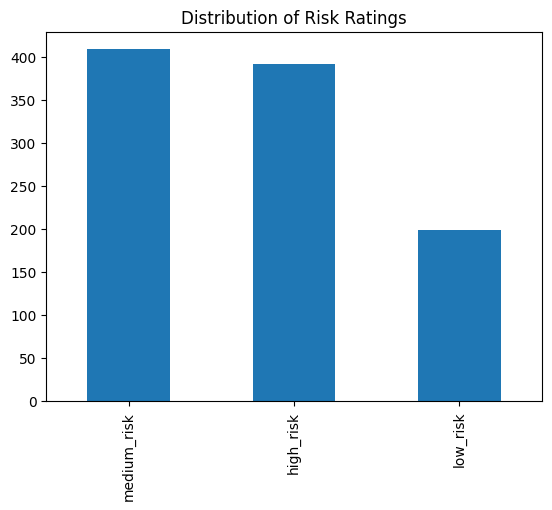

medium_risk    0.409
high_risk      0.392
low_risk       0.199
Name: Risk_Rating, dtype: float64


In [ ]:
## RUN THIS CODE TO GENERATE THE SYNTHETIC DATA

np.random.seed(42)  # For reproducibility

n_samples = 1_000

# Generate synthetic features with noise
volatility = np.random.normal(1, 0.3, n_samples)
past_returns = np.random.normal(10, 5, n_samples)
market_cap = np.random.normal(200, 100, n_samples)
pe_ratio = np.random.normal(15, 10, n_samples)
# Introducing a new feature: interaction term (example: market cap * PE ratio)
interaction_term = market_cap * pe_ratio / 1000

# Initialize target labels array
labels = np.empty(n_samples, dtype=object)

# Define risk rating logic more clearly
for i in range(n_samples):
    # More nuanced conditions for risk categorization
    high_risk = (volatility[i] > 1.3) or (past_returns[i] < 5) or (pe_ratio[i] > 25)
    low_risk = (volatility[i] < 0.8) and (past_returns[i] > 15) or (market_cap[i] > 250)
    if high_risk:
        labels[i] = 'high_risk'
    elif low_risk:
        labels[i] = 'low_risk'
    else:
        labels[i] = 'medium_risk'

# Introduce noise by flipping labels for a small percentage of the dataset
noise_indices = np.random.choice(n_samples, size=int(n_samples * 0.05), replace=False)
for i in noise_indices:
    labels[i] = np.random.choice(['high_risk', 'medium_risk', 'low_risk'])

# Create and shuffle the DataFrame
data = pd.DataFrame({
    'Volatility': volatility,
    'Past_Returns': past_returns,
    'Market_Cap': market_cap,
    'PE_Ratio': pe_ratio,
    'Interaction_Term': interaction_term,  # New feature
    'Risk_Rating': labels
})

data = data.sample(frac=1).reset_index(drop=True)  # Shuffle the data

# Visualize the distribution of risk ratings
data['Risk_Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Risk Ratings')
plt.show()

print(data['Risk_Rating'].value_counts() / n_samples)

#converting labels into classes
data['Risk_Rating'] = data['Risk_Rating'].map({'high_risk':0,'medium_risk': 1, 'low_risk': 2})

## Splitting the data into train and test

- Run the following code to split you data into $(X,Y)$, and into training and testing sets.

In [ ]:
## RUN THIS CODE

# Split data into features and labels
X = data.drop("Risk_Rating", axis=1)
y = data["Risk_Rating"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Question 7

- This question is meant to illustrate some of the patterns that neural networks learn.

- To start, begin training the default neural network by running the following cell (i.e. clicking the **Run** button).

- **Please implement the given instructions (you may use the following code to and fill-in any missing pieces; but feel free to write it yourself for practice).**

### Model Architecture

The model is structured as a sequential model in TensorFlow's Keras API, comprising four Dense layers:

1. **First Dense Layer**:
   - Units: 64
   - Activation: ReLU
   - Input Shape: Matches `X_train_scaled.shape[1]`

2. **Second Dense Layer**:
   - Units: 128
   - Activation: ReLU

3. **Third Dense Layer**:
   - Units: 256
   - Activation: ReLU

4. **Output Dense Layer**:
   - Units: 3
   - Activation: Softmax

### Compilation of the Model

The model is compiled with the following configurations:

- **Optimizer**: Adam (A popular choice for deep learning tasks)
- **Loss Function**: Sparse Categorical Crossentropy (Suitable for multi-class classification where labels are integers)
- **Metrics**: Accuracy (To track the accuracy during training and testing)

### Training the Model

The model is trained with the following parameters:

- **Training Data**: `X_train_scaled` and `y_train`
- **Number of Epochs**: 50
- **Validation Split**: 20% of the training data is used for validation.

- Complete the missing pieces of the following code; i.e. replace **`None`** with the appropriate values.

Epoch 1/50
18/18 [==============================] - 1s 13ms/step - loss: 0.9103 - accuracy: 0.6000 - val_loss: 0.7229 - val_accuracy: 0.7000
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.7196 - val_loss: 0.6647 - val_accuracy: 0.7429
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7607 - val_loss: 0.5769 - val_accuracy: 0.7786
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8089 - val_loss: 0.5120 - val_accuracy: 0.7857
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.8286 - val_loss: 0.5071 - val_accuracy: 0.8214
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.8393 - val_loss: 0.5105 - val_accuracy: 0.8286
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8625 - val_loss: 0.4246 - val_accuracy: 0.8286
Epoch 8/50
18/18 [=

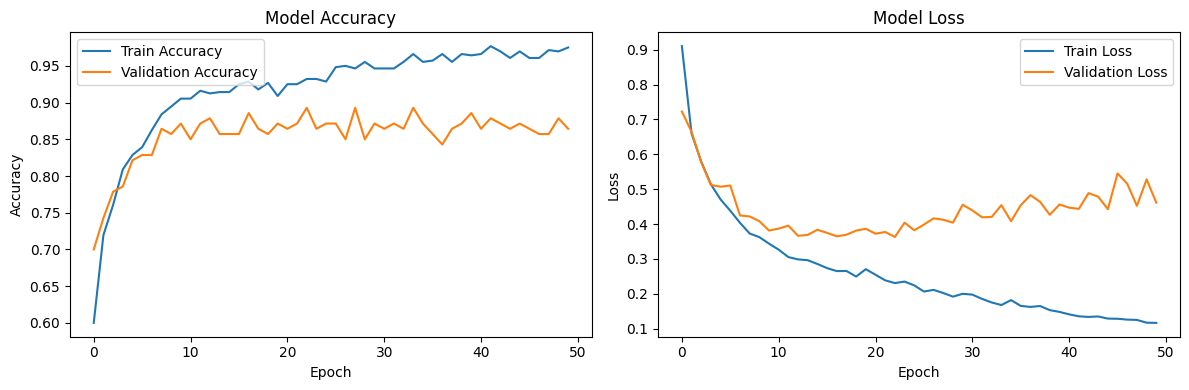

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100}%")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Loss plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# comment
# I believe we are overfitting. The model is complex enough to capture the noise of the training data.
# This is reflected by a diminishing training loss, but increasing test loss (after epoch 10 more or less)

## Question 8

- This question is meant to illustrate the use of **activation functions**.

- Try replacing the **ReLU** activation function with a **tanh** activation function, and train the network again.

- Notice that it finds a solution very slow.

- **Please implement the given instructions (you may use the following code to and fill-in any missing pieces; but feel free to write it yourself for practice).**

- Please refer to the model architecture below and fill in the missing code to run it.

### Model Architecture

The model is structured as a sequential model in TensorFlow's Keras API, comprising four Dense layers:

1. **First Dense Layer**:
   - Units: 64
   - Activation: tanh
   - Input Shape: Matches `X_train_scaled.shape[1]`

2. **Second Dense Layer**:
   - Units: 128
   - Activation: tanh

3. **Third Dense Layer**:
   - Units: 256
   - Activation: tanh

4. **Output Dense Layer**:
   - Units: 3
   - Activation: Softmax

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 0.8097 - accuracy: 0.6179 - val_loss: 0.7347 - val_accuracy: 0.6929
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.6929 - val_loss: 0.6720 - val_accuracy: 0.7071
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.7071 - val_loss: 0.6746 - val_accuracy: 0.7143
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.7089 - val_loss: 0.6610 - val_accuracy: 0.7143
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.7304 - val_loss: 0.6766 - val_accuracy: 0.7143
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.7143 - val_loss: 0.6650 - val_accuracy: 0.7286
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.7268 - val_loss: 0.6784 - val_accuracy: 0.7143
Epoch 8/100


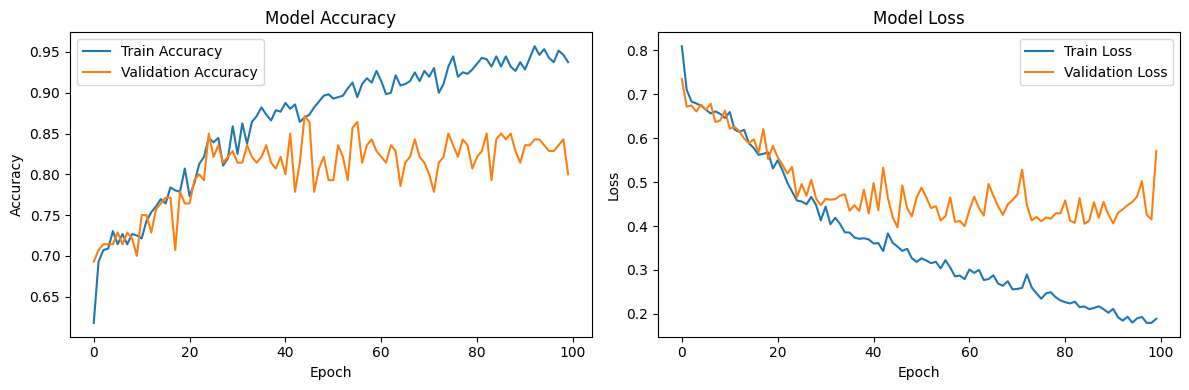

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100}%")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Loss plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Question 9

- This question is meant to illustrate what happens when neural networks are **too small**.

- Please fill the code with the given model architecture below.

- Notice that the neural network is now incapable of finding a good solution, even if you try multiple times.

- The model has too few parameters and systematically **underfits** the training set.

- **Please implement the given instructions (you may use the following code to and fill-in any missing pieces; but feel free to write it yourself for practice).**

### Model Architecture

The model is structured as a sequential model in TensorFlow's Keras API, comprising four Dense layers:

1. **First Dense Layer**:
   - Units: 1
   - Activation: ReLU
   - Input Shape: Matches `X_train_scaled.shape[1]`

2. **Output Dense Layer**:
   - Units: 3
   - Activation: Softmax

10/10 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.5100
Test Accuracy: 50.999999046325684%


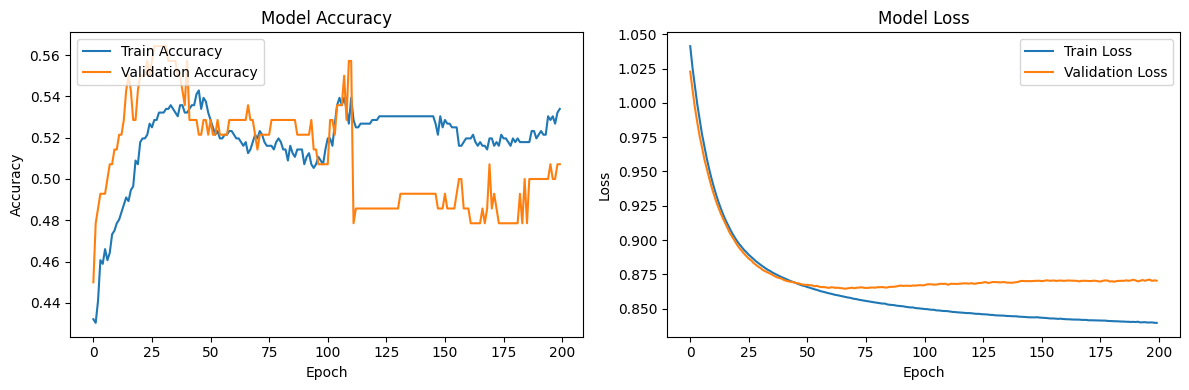

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200,validation_split=0.2,verbose = 0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100}%")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Loss plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

- *If you are curious (you don't need to be), see what happens if you weak the architecture by possibly adding another layer and another unit in each layer, or some other simple combination so that the model is still shallow and still narrow.*

In [ ]:
# here we are doing the opposite: underfitting
# the model is not complex enough, and it suffers from omission bias.
# we need to introduce more neurons to enhance the complexity

10/10 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8767
Test Accuracy: 87.66666650772095%


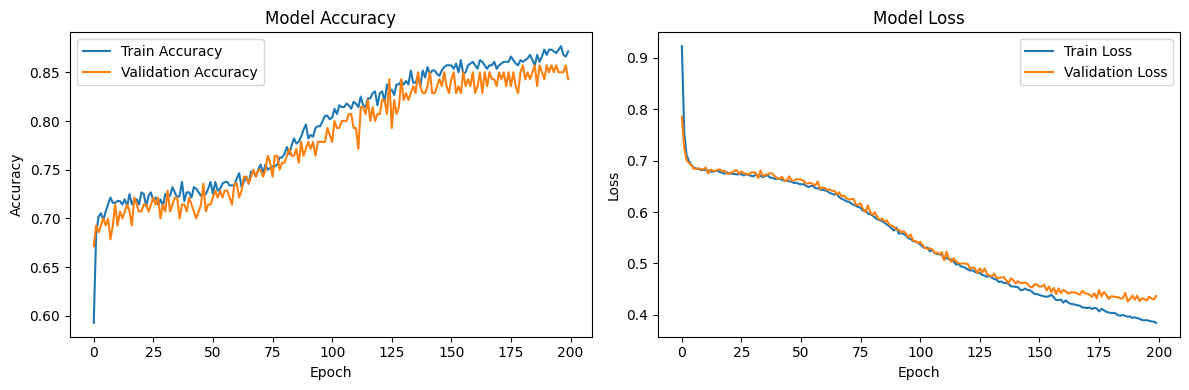

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200,validation_split=0.2,verbose = 0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100}%")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Loss plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

10/10 [==============================] - 0s 1ms/step - loss: 0.8364 - accuracy: 0.6400
Test Accuracy: 63.999998569488525%


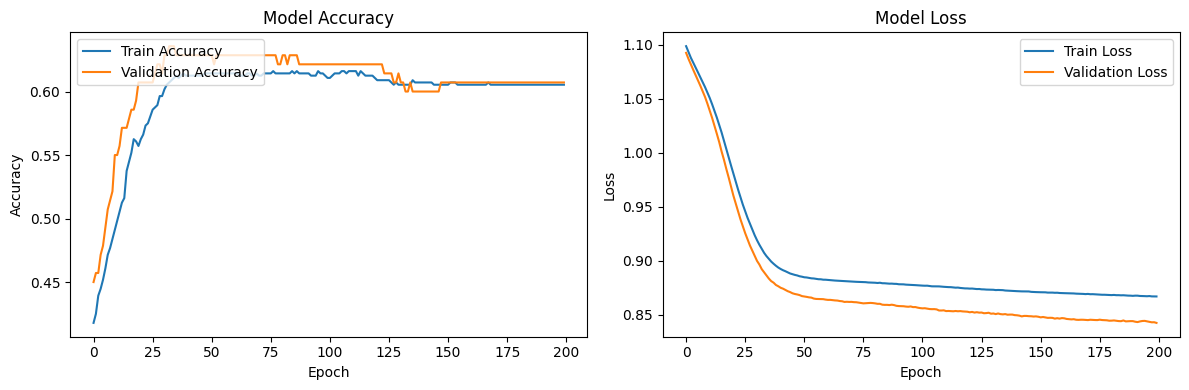

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='tanh'),
    tf.keras.layers.Dense(1, activation='tanh'),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200,validation_split=0.2,verbose = 0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100}%")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Loss plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Question 10

- This question is meant to illustrate what happens when neural networks are **large enough**.

- So lets see how adding more layers will make the neural networks achieve better results quickly.

- **Please implement the given instructions (you may use the following code to and fill-in any missing pieces; but feel free to write it yourself for practice).**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 16)                96        
                                                                 
 dense_45 (Dense)            (None, 3)                 51        
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


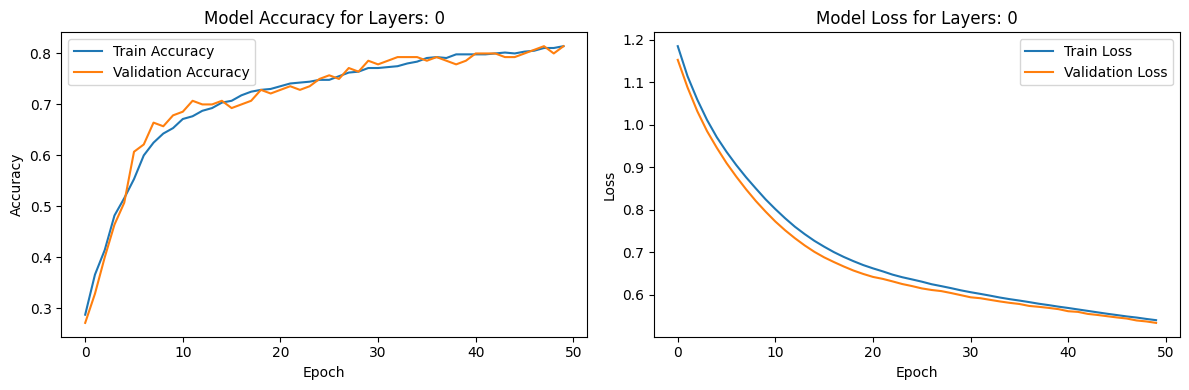

10/10 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.8367
Test Accuracy: 83.66666436195374%
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 16)                96        
                                                                 
 dense_47 (Dense)            (None, 3)                 51        
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


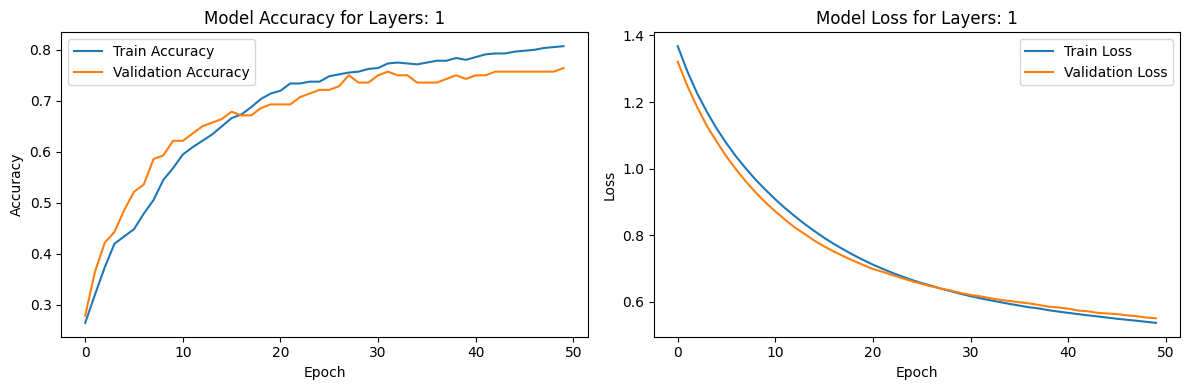

10/10 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.8067
Test Accuracy: 80.66666722297668%
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                96        
                                                                 
 dense_49 (Dense)            (None, 16)                272       
                                                                 
 dense_50 (Dense)            (None, 3)                 51        
                                                                 
Total params: 419 (1.64 KB)
Trainable params: 419 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


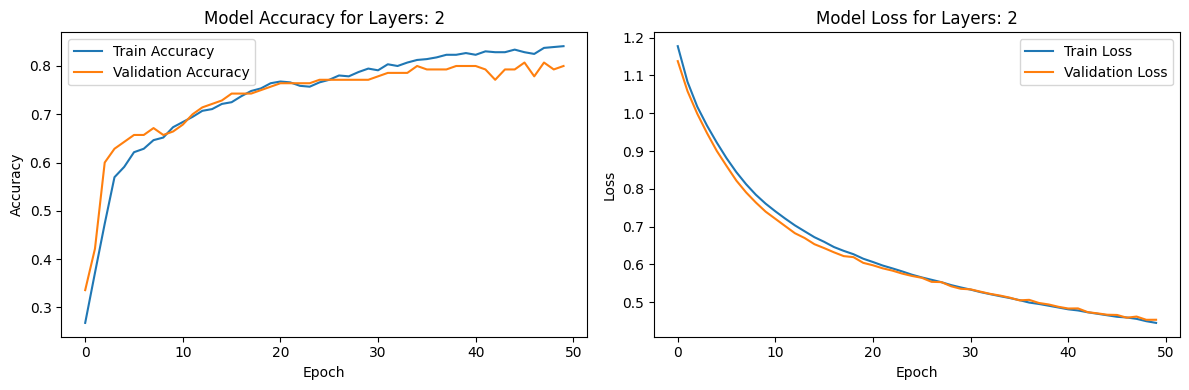

10/10 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8433
Test Accuracy: 84.33333039283752%
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                96        
                                                                 
 dense_52 (Dense)            (None, 16)                272       
                                                                 
 dense_53 (Dense)            (None, 32)                544       
                                                                 
 dense_54 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1011 (3.95 KB)
Trainable params: 1011 (3.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


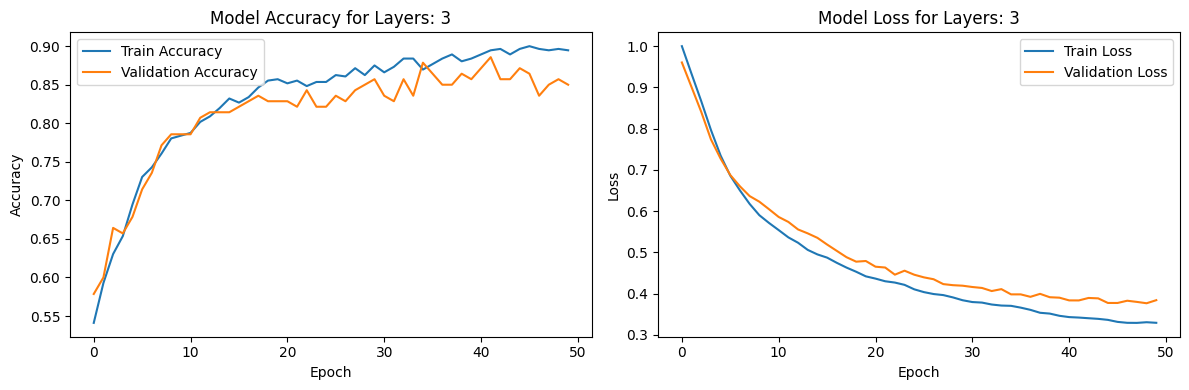

10/10 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8933
Test Accuracy: 89.33333158493042%
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 16)                96        
                                                                 
 dense_56 (Dense)            (None, 16)                272       
                                                                 
 dense_57 (Dense)            (None, 32)                544       
                                                                 
 dense_58 (Dense)            (None, 48)                1584      
                                                                 
 dense_59 (Dense)            (None, 3)                 147       
                                                                 
Total params: 2643 (10.32 KB)
Trainable params: 2643 (10.32 KB)


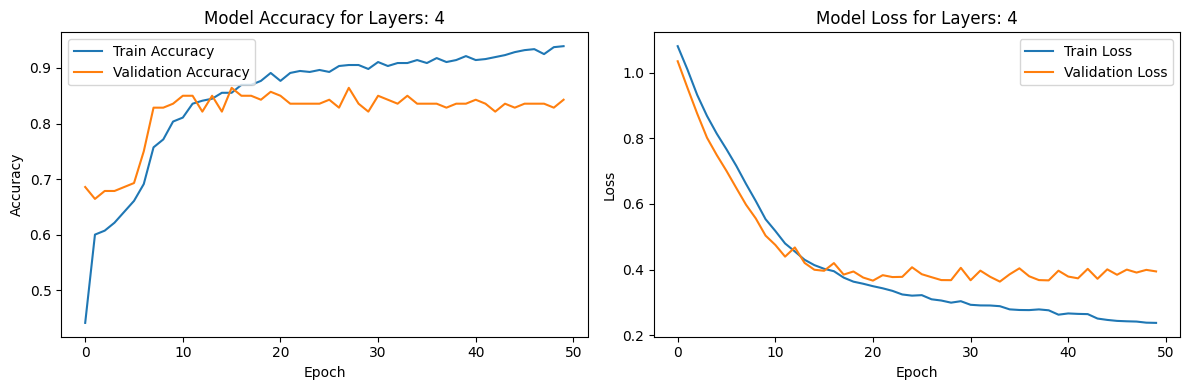

10/10 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8867
Test Accuracy: 88.66666555404663%
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                96        
                                                                 
 dense_61 (Dense)            (None, 16)                272       
                                                                 
 dense_62 (Dense)            (None, 32)                544       
                                                                 
 dense_63 (Dense)            (None, 48)                1584      
                                                                 
 dense_64 (Dense)            (None, 64)                3136      
                                                                 
 dense_65 (Dense)            (None, 3)                 195      

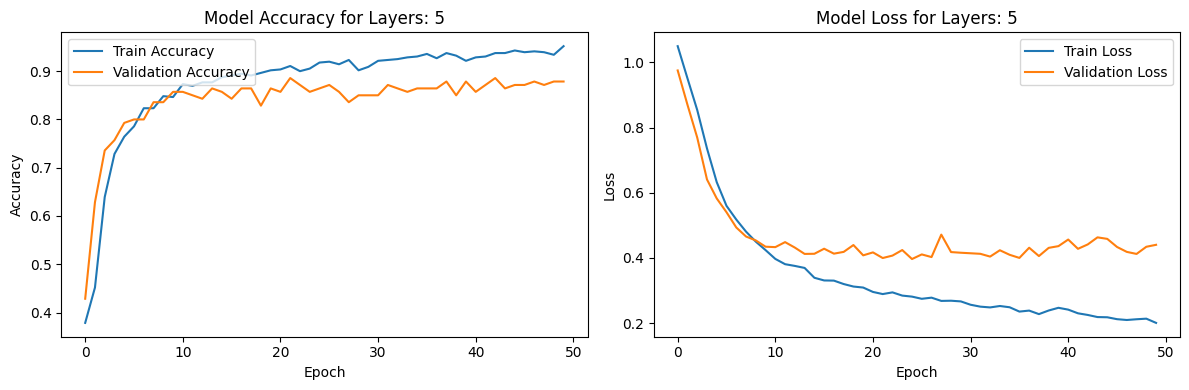

10/10 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.9100
Test Accuracy: 91.00000262260437%


In [ ]:
history_list = {}
num_hidden_layers = 6


for i in range(0,num_hidden_layers):
  # Define the model
  layers = [tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],))] # input layer
  if i > 0:
    layers = layers + [tf.keras.layers.Dense(16*n, activation='relu') for n in range(1,i)] # hidden layers
  layers = layers + [tf.keras.layers.Dense(3, activation="softmax")] # output layer
  model = tf.keras.Sequential(layers)

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
                metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose = 0)

  print(model.summary())

  history_list[i] = history
  # Plotting
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))

  # Accuracy plot
  ax[0].plot(history.history['accuracy'], label='Train Accuracy')
  ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
  ax[0].set_title('Model Accuracy for Layers: ' + str(i))
  ax[0].set_ylabel('Accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].legend(loc='upper left')

  # Loss plot
  ax[1].plot(history.history['loss'], label='Train Loss')
  ax[1].plot(history.history['val_loss'], label='Validation Loss')
  ax[1].set_title('Model Loss for Layers: ' + str(i))
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(loc='upper right')

  plt.tight_layout()
  plt.show()

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test_scaled, y_test)
  print(f"Test Accuracy: {accuracy * 100}%")

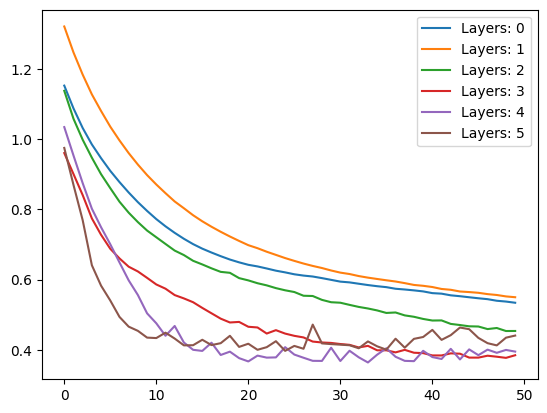

In [ ]:
# Loss
for i in range(0,num_hidden_layers):
  plt.plot(history_list[i].history['val_loss'], label='Layers: ' + str(i))
plt.legend()
plt.show()

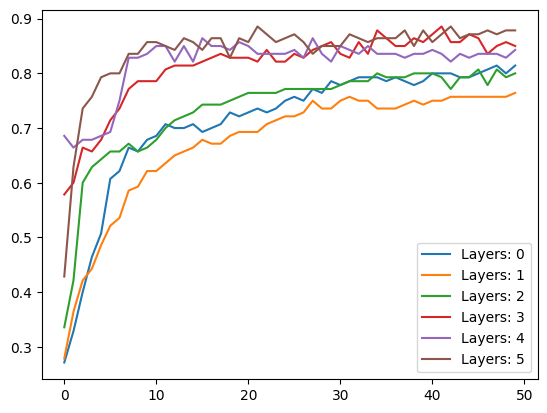

In [ ]:
# Accuracy
for i in range(0,num_hidden_layers):
  plt.plot(history_list[i].history['val_accuracy'], label='Layers: ' + str(i))
plt.legend()
plt.show()

## Question 11

- This question is meant to illustrate the risk of a loss function's gradient vanishing (i.e. have a gradient of zero, so that the weights don't know what direction to move in).

- The easiest way to verify is to start with weights all set to zero instead of random initially.

- Notice that training doesnt improve at all due to the gradient in the ReLU activation function at zero always being zero, which prevents the loss function from updating.

- Please refer to the code below on how to use it in the layers for setting the weights to zero.

- Lets reuse the same model architecture we used in Question 7; compare your solution with Question 7 and see how this gradient problem can become a first-order problem.

- **Please implement the given instructions (you may use the following code to and fill-in any missing pieces; but feel free to write it yourself for practice).**

### Model Architecture

The model is structured as a sequential model in TensorFlow's Keras API, comprising four Dense layers:

1. **First Dense Layer**:
   - Units: 64
   - Activation: ReLU
   - Input Shape: Matches `X_train_scaled.shape[1]`

2. **Second Dense Layer**:
   - Units: 128
   - Activation: ReLU

3. **Third Dense Layer**:
   - Units: 256
   - Activation: ReLU

4. **Output Dense Layer**:
   - Units: 3
   - Activation: Softmax

In [ ]:
# How the initializer is used in layers
initializer = tf.keras.initializers.Zeros()
layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

10/10 [==============================] - 0s 1ms/step - loss: 1.0651 - accuracy: 0.4167
Test Accuracy: 41.66666567325592%


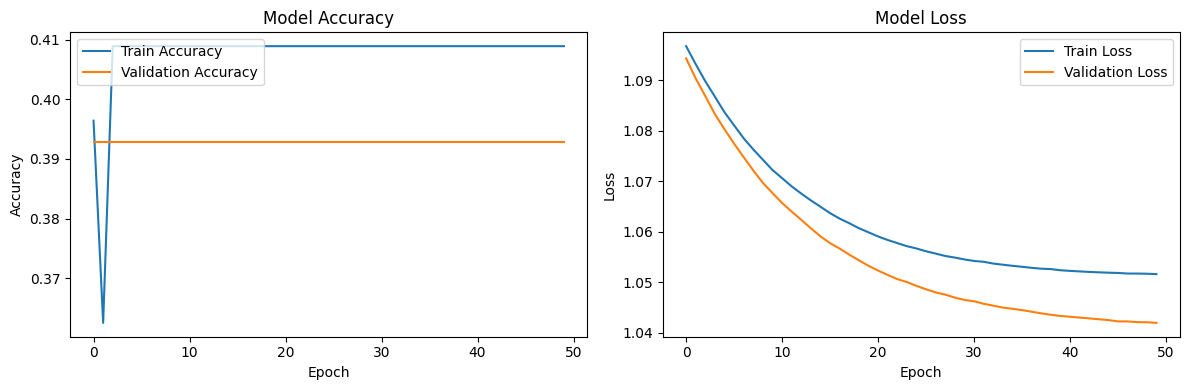

In [ ]:
# Define the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_initializer=tf.keras.initializers.Zeros()),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose = 0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100}%")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

# Loss plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

$\rule{800pt}{20pt}$

# Extra-Practice Question: You Do NOT Need to Complete this Question

- This question is optional, but it is good practice, so feel free to complete it!


# On-Layer Regularization

In the context of neural networks, especially when working with deep architectures, a critical observation often arises. It's something you might have noted in **question 10**: as the number of hidden layers increases, along with their number of neurons (units), there is a notable divergence between the training and validation metrics. Specifically, the loss on the validation set starts to increase, or the accuracy on the validation set begins to decrease, even as these metrics continue to improve on the training set. This phenomenon is a classic indicator of **overfitting**.

Overfitting occurs when our model learns not only the underlying patterns in the training data but also the noise and specific details unique to that dataset. As a result, while it performs exceptionally well on the training data, its ability to generalize to new, unseen data (like our validation set) is compromised.

## Addressing Overfitting: Regularization through Layers

One effective strategy to mitigate overfitting is to employ **regularization**. Regularization techniques adjust the learning process to discourage the model from learning the noise in the training data. They essentially help the model to generalize better.

### Dropout: A Popular Regularization Technique

A common and effective form of regularization in neural networks is achieved through a layer called **Dropout**. The concept of Dropout is quite straightforward but powerful:

- During training, some number of layer outputs are randomly ignored or "dropped out."
- This prevents units from co-adapting too much to the training data.
- During training, dropout layers will randomly "turn off" a proportion of their neurons.
- This randomness helps the network to become less sensitive to the specific weights of neurons, leading to better generalization.

When implementing neural networks using frameworks like TensorFlow, the `Dropout` layer can be easily added between the existing layers of our model. The dropout rate (the fraction of the input units to drop) is a crucial hyperparameter to tune.

For a deeper understanding, you might want to explore more about Dropout, including its original research paper and its various implementations in TensorFlow or other deep learning libraries.

---

*By incorporating Dropout layers into our model, we are effectively introducing on-layer regularization, helping our model to generalize better and reduce the overfitting on training data.*

---


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 16)                96        
                                                                 
 dense_76 (Dense)            (None, 3)                 51        
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


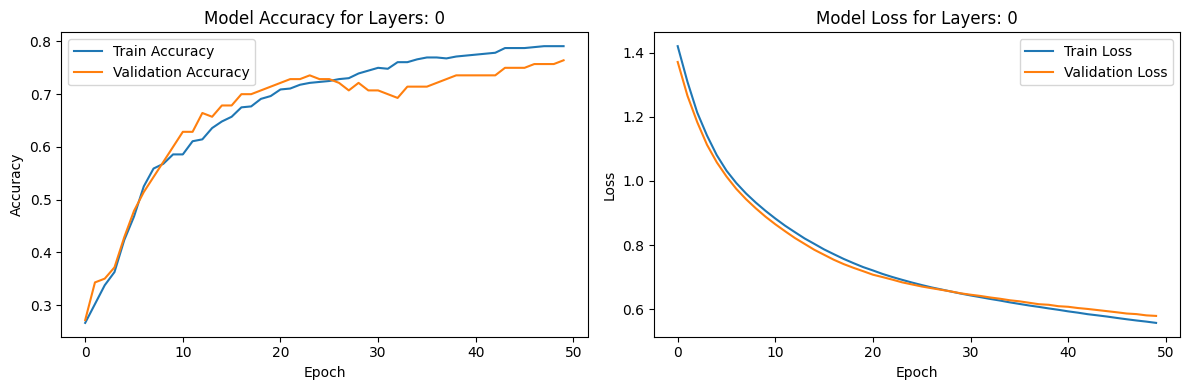

10/10 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.8300
Test Accuracy: 82.99999833106995%
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 16)                96        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_78 (Dense)            (None, 3)                 51        
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


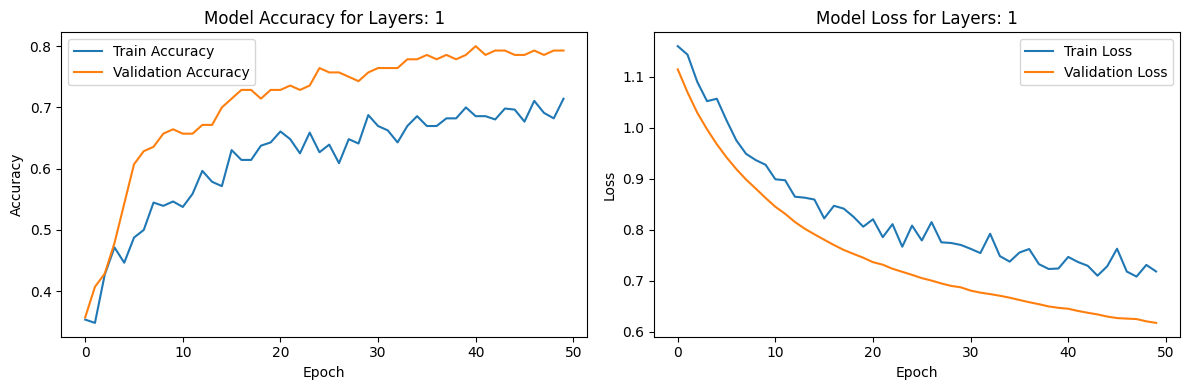

10/10 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7767
Test Accuracy: 77.66666412353516%
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 16)                96        
                                                                 
 dense_80 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_81 (Dense)            (None, 3)                 51        
                                                                 
Total params: 419 (1.64 KB)
Trainable params: 419 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


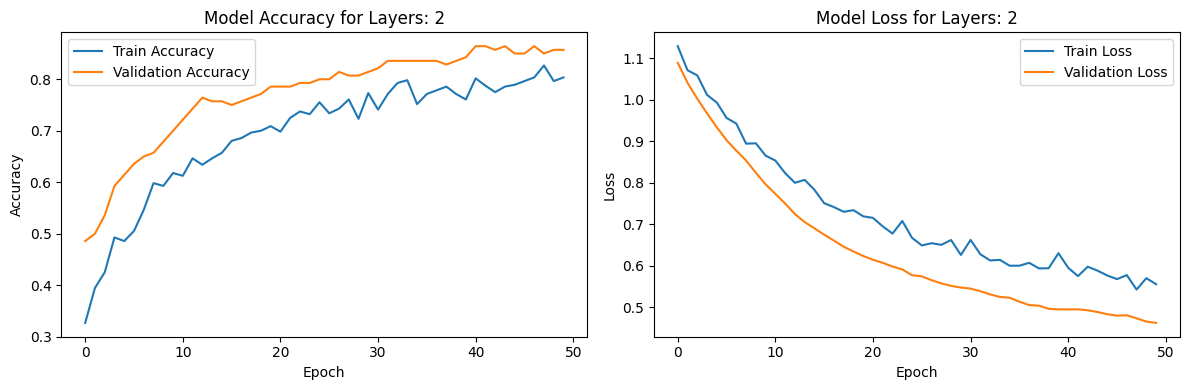

10/10 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8733
Test Accuracy: 87.33333349227905%
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 16)                96        
                                                                 
 dense_83 (Dense)            (None, 16)                272       
                                                                 
 dense_84 (Dense)            (None, 32)                544       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_85 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1011 (3.95 KB)
Trainable params: 1011 (3.95 KB)
No

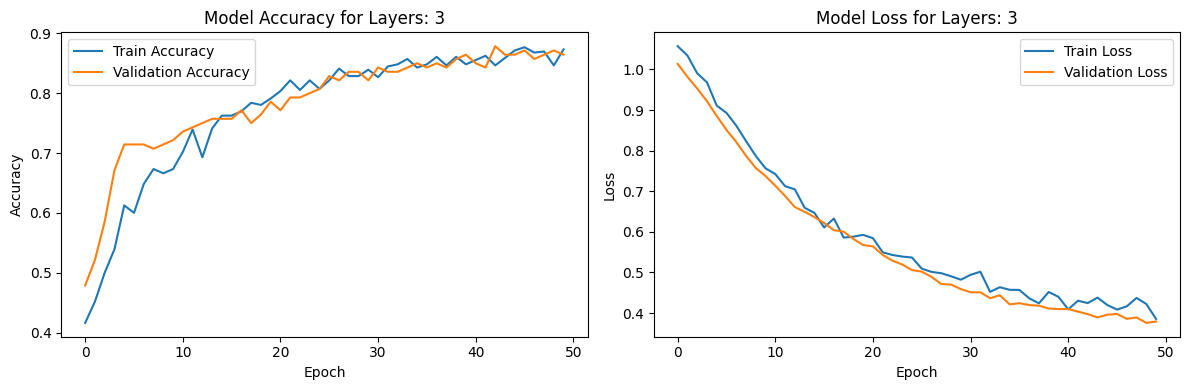

10/10 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8867
Test Accuracy: 88.66666555404663%
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 16)                96        
                                                                 
 dense_87 (Dense)            (None, 16)                272       
                                                                 
 dense_88 (Dense)            (None, 32)                544       
                                                                 
 dense_89 (Dense)            (None, 48)                1584      
                                                                 
 dropout_3 (Dropout)         (None, 48)                0         
                                                                 
 dense_90 (Dense)            (None, 3)                 147      

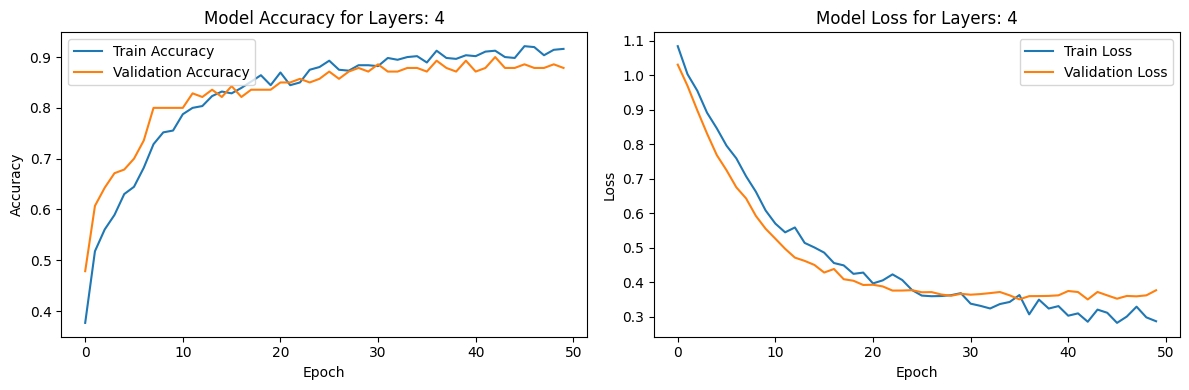

10/10 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.9033
Test Accuracy: 90.3333306312561%
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 16)                96        
                                                                 
 dense_92 (Dense)            (None, 16)                272       
                                                                 
 dense_93 (Dense)            (None, 32)                544       
                                                                 
 dense_94 (Dense)            (None, 48)                1584      
                                                                 
 dense_95 (Dense)            (None, 64)                3136      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         

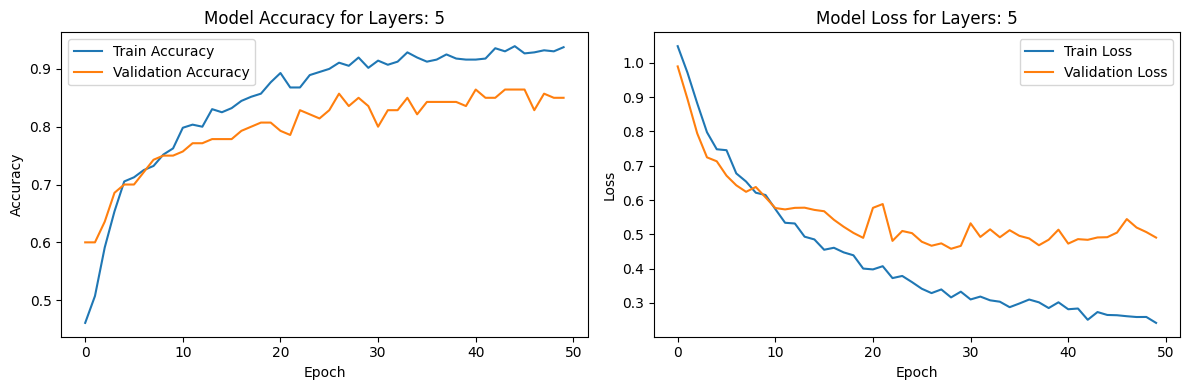

10/10 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8767
Test Accuracy: 87.66666650772095%


In [ ]:
# Hint refer the Question - 11 code and add Dropout layer after each dense layer.
history_list = {}

num_hidden_layers = 6 # Use 6 for optimal reference.

for i in range(0,num_hidden_layers):
  # Define the model

  layers = [tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],))] # input layer
  if i > 0:
    layers = layers + [tf.keras.layers.Dense(16*n, activation='relu') for n in range(1,i)] # hidden layers
    layers = layers + [tf.keras.layers.Dropout(rate=0.5)] # dropout layers are added for regularization # Use 0.5 probability
  layers = layers + [tf.keras.layers.Dense(3, activation='softmax')] # output layer
  model = tf.keras.Sequential(layers)

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
                metrics=['accuracy'])

  print(model.summary())

  # Train the model
  history = model.fit(X_train_scaled, y_train, epochs=50,validation_split=0.2,verbose = 0)

  history_list[i] = history
  # Plotting
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))

  # Accuracy plot
  ax[0].plot(history.history['accuracy'], label='Train Accuracy')
  ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
  ax[0].set_title('Model Accuracy for Layers: ' + str(i))
  ax[0].set_ylabel('Accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].legend(loc='upper left')

  # Loss plot
  ax[1].plot(history.history['loss'], label='Train Loss')
  ax[1].plot(history.history['val_loss'], label='Validation Loss')
  ax[1].set_title('Model Loss for Layers: ' + str(i))
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(loc='upper right')

  plt.tight_layout()
  plt.show()

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test_scaled, y_test)
  print(f"Test Accuracy: {accuracy * 100}%")